In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import re
import string

# Reset the output dimensions
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import decomposition
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.metrics import f1_score, accuracy_score, hamming_loss
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer

# from skmultilearn.problem_transform import BinaryRelevance, LabelPowerset

from scipy import linalg
import networkx as nx

from collections import Counter, defaultdict
import pickle

import nltk
nltk.download('wordnet')
from nltk import stem
from nltk.stem import PorterStemmer, WordNetLemmatizer, SnowballStemmer

# from gensim import matutils, models
# from gensim.models import Word2Vec
from wordcloud import WordCloud


import scipy.sparse

from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# import squarify

import warnings
warnings.filterwarnings('ignore')

! pip install apyori
from apyori import apriori

# from mlxtend.preprocessing import TransactionEncoder
from multiprocessing import  Pool

import transformers

import tensorflow as tf
from tqdm import tqdm

plt.rcParams['figure.figsize'] = [24, 12]
plt.style.use('seaborn-darkgrid')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\utkar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


ModuleNotFoundError: No module named 'transformers'

In [3]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.optimizers import Adam
from keras.initializers import Constant

In [4]:
# Detect hardware, return appropriate distribution strategy

try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS available: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.0.0.2:8470
REPLICAS available:  8


In [5]:
train = pd.read_csv('/kaggle/input/60k-stack-overflow-questions-with-quality-rate/data.csv')
train.columns = train.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

lang = pd.read_csv('/kaggle/input/programming-languages/languages.csv')
lang = lang[['name']]

print('Train Data shape: ', train.shape)

train.head(10)

Train Data shape:  (60000, 6)


,id,title,body,tags,creationdate,y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34552974,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT
2,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
3,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
4,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
5,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ
6,34554026,Accessing pointer member of the structure usin...,<p>I have defined integer pointer inside the s...,<c><pointers><data-structures>,2016-01-01 06:21:17,LQ_CLOSE
7,34554206,"How To Disable 2nd Saturday 4th Saturday ,Sund...","i want to Disable 2nd Saturday 4th saturday,...",<javascript><jquery><jquery-ui>,2016-01-01 06:55:18,LQ_EDIT
8,34554671,Resizing containers in bootstrap,I am new to bootstrap and i would like to find...,<jquery><html><css><twitter-bootstrap>,2016-01-01 08:32:05,LQ_EDIT
9,34554721,Retrieve all except some data of the another t...,I have two table m_master and tbl_appointment\...,<php><mysql><sql><codeigniter><mysqli>,2016-01-01 08:43:50,LQ_EDIT


In [6]:
train['tags'] = train['tags'].str.replace('>',',')
train['tags'] = train['tags'].str.replace('<','')
lang['name'] = lang['name'].apply(lambda x: x.lower())
lang.head()

,name
0,a# .net
1,a# (axiom)
2,a-0 system
3,a+
4,a++


In [7]:
train['y'].value_counts()

LQ_EDIT     20000
HQ          20000
LQ_CLOSE    20000
Name: y, dtype: int64

In [8]:
train.head()

,id,title,body,tags,creationdate,y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,"java,repeat,",2016-01-01 00:21:59,LQ_CLOSE
1,34552974,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,"sql,sql-server,",2016-01-01 01:44:52,LQ_EDIT
2,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,"java,optional,",2016-01-01 02:03:20,HQ
3,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,"javascript,image,overlay,react-native,opacity,",2016-01-01 02:48:24,HQ
4,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...","swift,operators,whitespace,ternary-operator,op...",2016-01-01 03:30:17,HQ


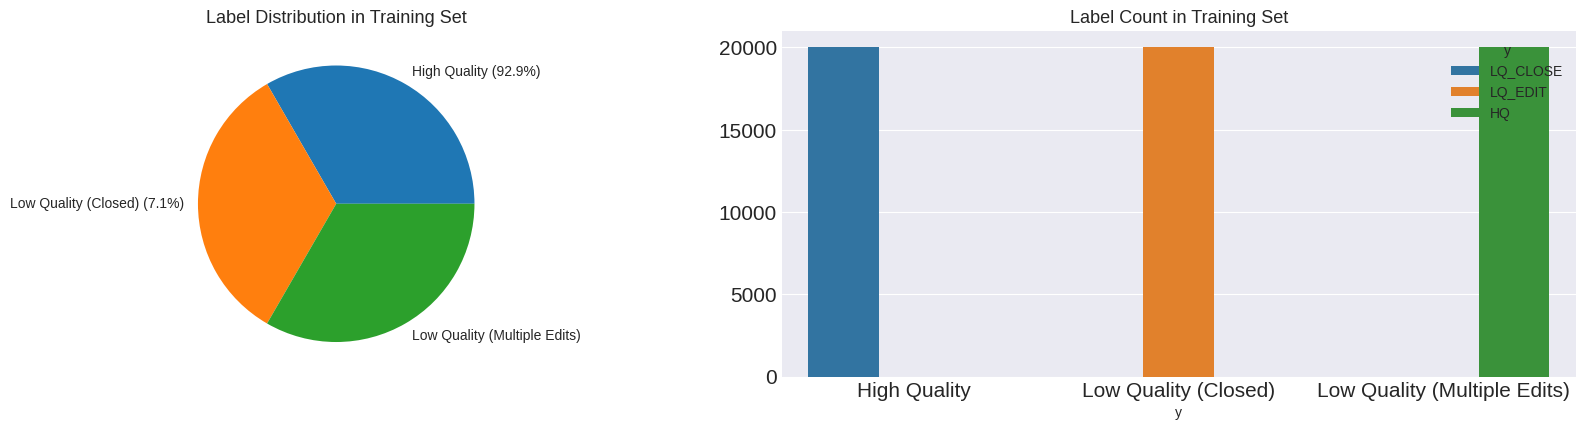

In [9]:
fig, axes = plt.subplots(ncols = 2, figsize = (17, 4), dpi = 100)
plt.tight_layout()

train.groupby('y').count()['id'].plot(kind = 'pie', ax = axes[0], labels = ['High Quality (92.9%)', 'Low Quality (Closed) (7.1%)', 'Low Quality (Multiple Edits)'])
sns.countplot(x = train['y'], hue = train['y'], ax = axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['High Quality', 'Low Quality (Closed)', 'Low Quality (Multiple Edits)'])
axes[0].tick_params(axis = 'x', labelsize = 15)
axes[0].tick_params(axis = 'y', labelsize = 15)
axes[1].tick_params(axis = 'x', labelsize = 15)
axes[1].tick_params(axis = 'y', labelsize = 15)

axes[0].set_title('Label Distribution in Training Set', fontsize = 13)
axes[1].set_title('Label Count in Training Set', fontsize = 13)

plt.show()

## Finding top categories and sub categories which are mostly askede by the users

In [10]:
tags = train[['tags']]
tags = pd.concat([tags[['tags']], tags['tags'].str.split(',', expand = True)], axis = 1)
tags = tags.drop('tags', axis = 1)
tags.head()

,0,1,2,3,4,5,6
0,java,repeat,,None,None,None,None
1,sql,sql-server,,None,None,None,None
2,java,optional,,None,None,None,None
3,javascript,image,overlay,react-native,opacity,,None
4,swift,operators,whitespace,ternary-operator,optional,,None


## Most popular technologies

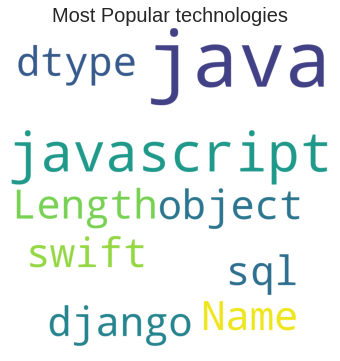

In [11]:
plt.rcParams['figure.figsize'] = (6, 6)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(tags[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular technologies',fontsize = 20)
plt.show()

## Frequency plot of most popular languages

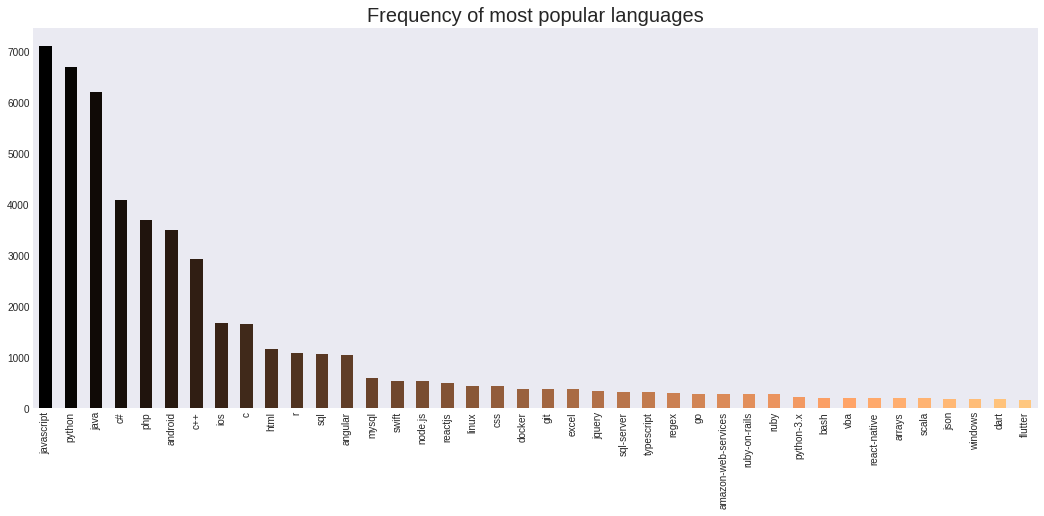

In [12]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
tags[0].value_counts().head(40).plot.bar(color = color)
plt.title('Frequency of most popular languages', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

## Tree map for most pouplar technologies

In [13]:
y = tags[0].value_counts().head(50).to_frame()
y.index

Index(['javascript', 'python', 'java', 'c#', 'php', 'android', 'c++', 'ios',
       'c', 'html', 'r', 'sql', 'angular', 'mysql', 'swift', 'node.js',
       'reactjs', 'linux', 'css', 'docker', 'git', 'excel', 'jquery',
       'sql-server', 'typescript', 'regex', 'go', 'amazon-web-services',
       'ruby-on-rails', 'ruby', 'python-3.x', 'bash', 'vba', 'react-native',
       'arrays', 'scala', 'json', 'windows', 'dart', 'flutter', 'vb.net',
       'angularjs', 'laravel', 'haskell', 'matlab', 'django', 'vue.js', 'perl',
       'kubernetes', 'visual-studio-code'],
      dtype='object')

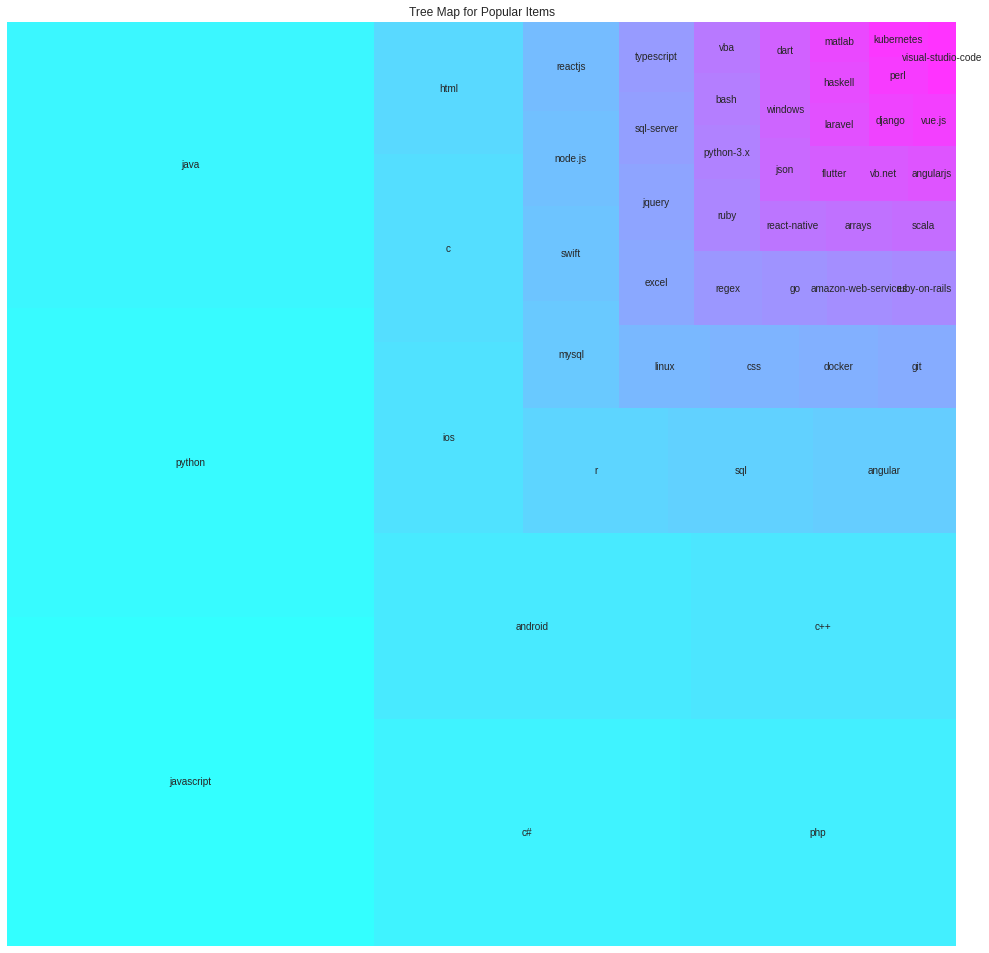

In [14]:
# plotting a tree map

plt.rcParams['figure.figsize'] = (17, 17)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha = .8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

## Top 15 technologies with most asked questions and top 15 sub categories' plots

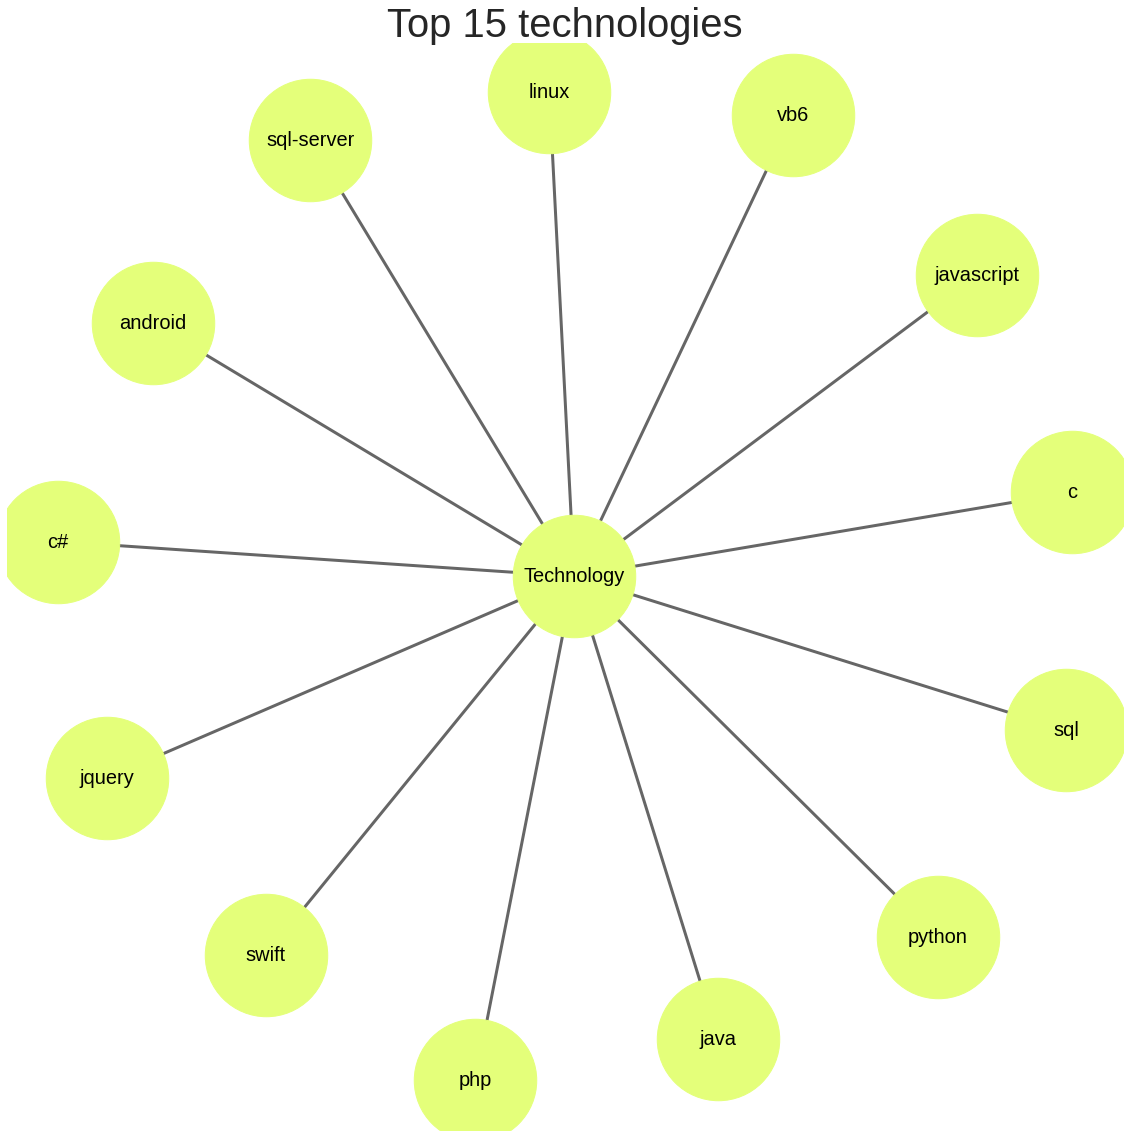

In [15]:
tags['technology'] = 'Technology'
technology = tags.truncate(before = -1, after = 15)

technology = nx.from_pandas_edgelist(technology, source = 'technology', target = 0, edge_attr = True)

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(technology)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(technology, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(technology, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(technology, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 technologies', fontsize = 40)
plt.show()

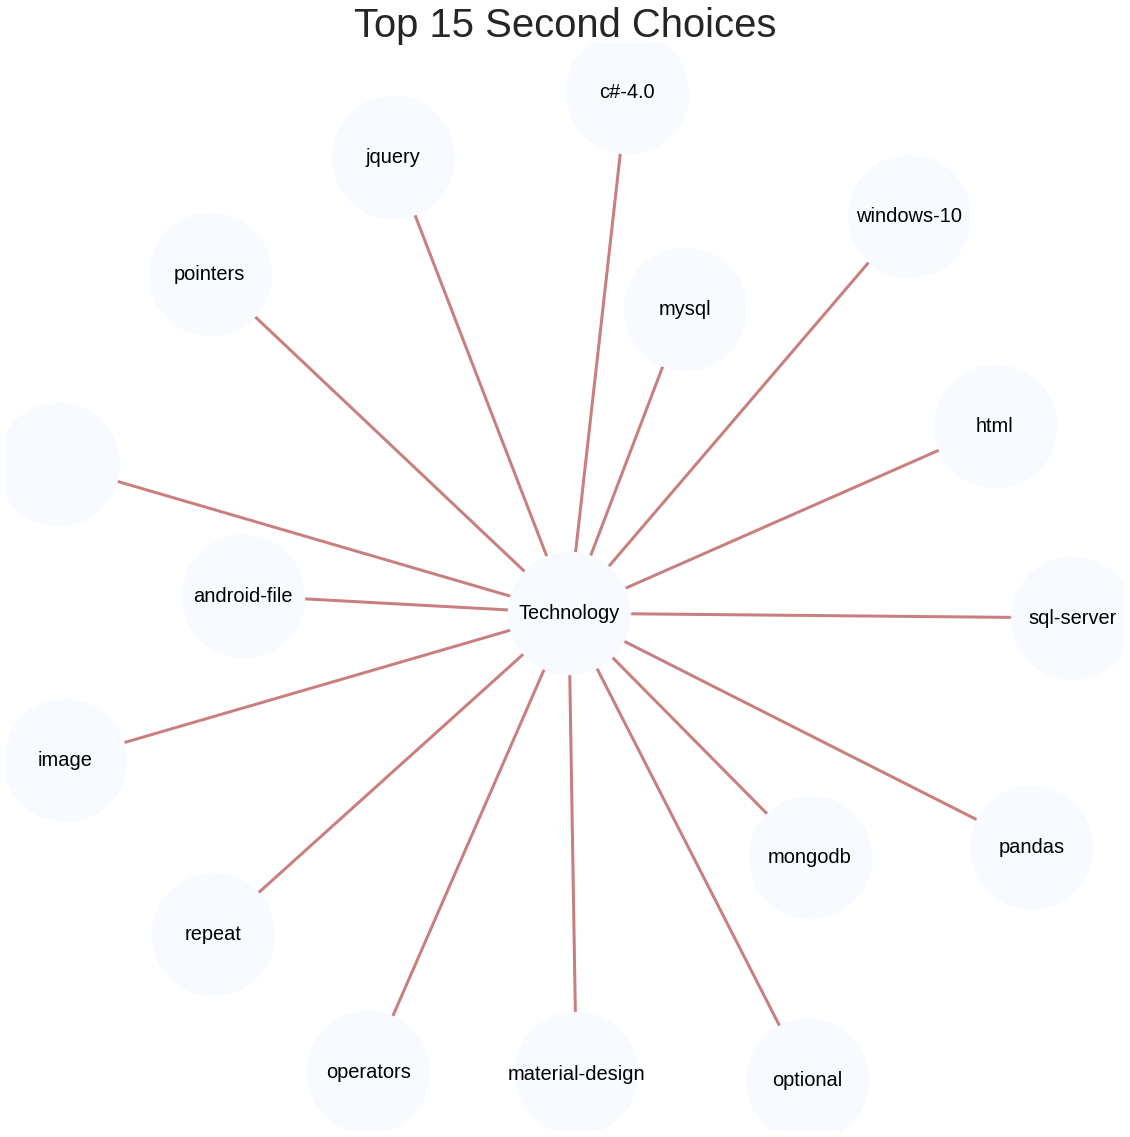

In [16]:
tags['secondchoice'] = 'Second Choice'
secondchoice = tags.truncate(before = -1, after = 15)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'technology', target = 1, edge_attr = True)

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Blues(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'brown')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Second Choices', fontsize = 40)
plt.show()

## Average word length in a tweet

Text(0.5, 0.98, 'Average word length in each question')

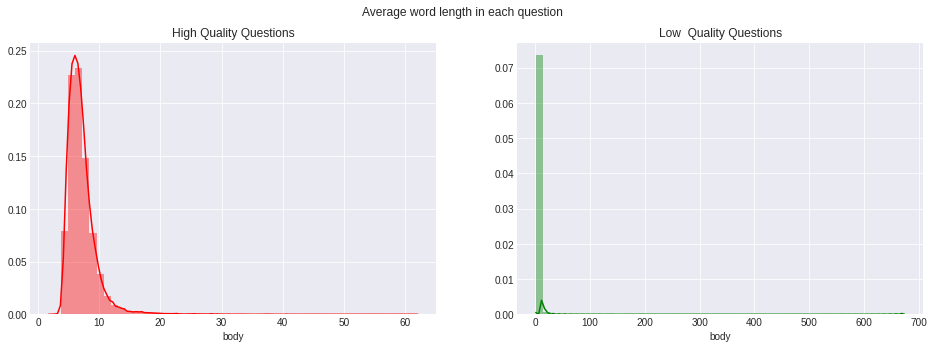

In [17]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize = (16, 5))
word  =  train[train['y'] == 'HQ']['body'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax  =  ax1, color = 'red')
ax1.set_title('High Quality Questions')
word  =  train[(train['y'] == 'LQ_EDIT') | (train['y'] == 'LQ_CLOSE')]['body'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax  =  ax2, color = 'green')
ax2.set_title('Low  Quality Questions')
fig.suptitle('Average word length in each question')

### **Analyze questions content among different categories**

#### 1. Category: High Quality

In [18]:
def create_corpus(target):
    corpus = []
    
    for x in train[train['y'] == target]['body'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

<BarContainer object of 10 artists>

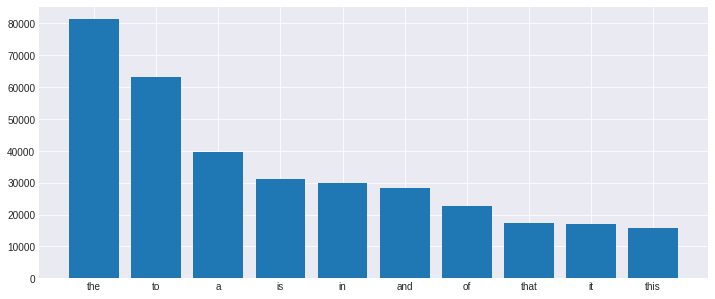

In [19]:
corpus = create_corpus('HQ')

plt.figure(figsize = (12, 5))

dic = defaultdict(int)
for word in corpus:
    if word in set(stopwords.words('english')):
        dic[word] += 1
        
top = sorted(dic.items(), key = lambda x:x[1], reverse = True)[:10]

x, y = zip(*top)
plt.bar(x, y)

#### 2. Category: Open Low Quality questions

<BarContainer object of 10 artists>

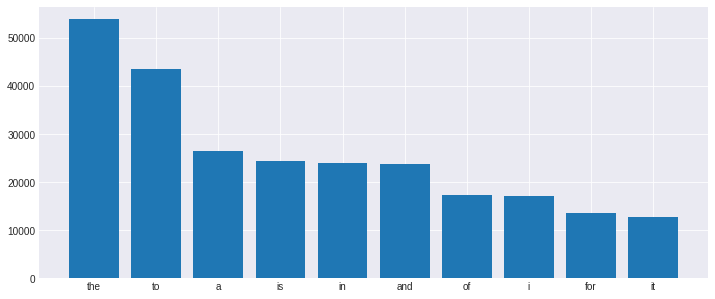

In [20]:
corpus = create_corpus('LQ_EDIT')

plt.figure(figsize = (12, 5))

dic = defaultdict(int)
for word in corpus:
    if word in set(stopwords.words('english')):
        dic[word] += 1
        
top = sorted(dic.items(), key = lambda x:x[1], reverse = True)[:10]

x, y = zip(*top)
plt.bar(x, y)

#### 3. Category: Closed Low Quality questions

<BarContainer object of 10 artists>

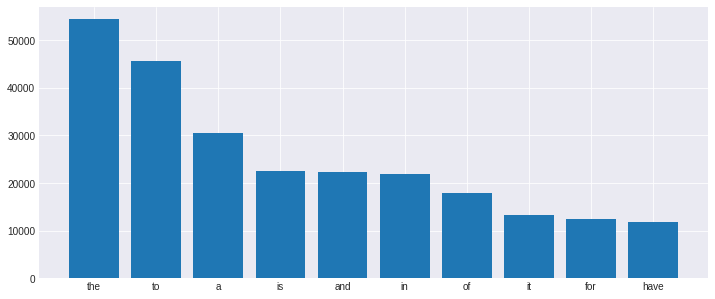

In [21]:
corpus = create_corpus('LQ_CLOSE')

plt.figure(figsize = (12, 5))

dic = defaultdict(int)
for word in corpus:
    if word in set(stopwords.words('english')):
        dic[word] += 1
        
top = sorted(dic.items(), key = lambda x:x[1], reverse = True)[:10]

x, y = zip(*top)
plt.bar(x, y)

### Common Words

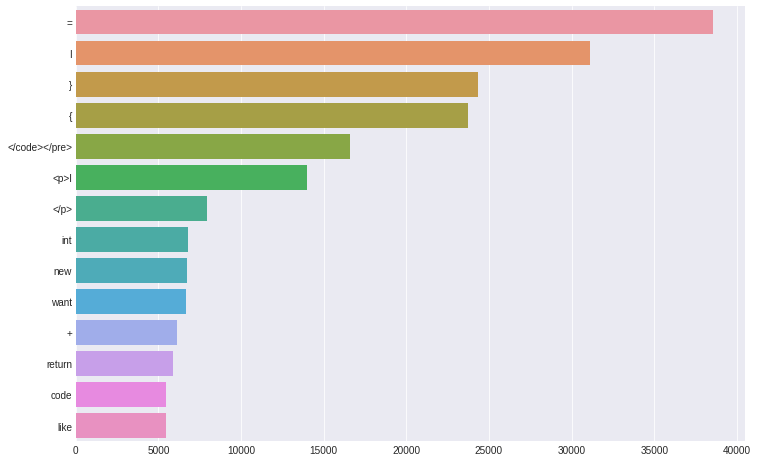

In [22]:
counter = Counter(corpus)
most = counter.most_common()
x = []
y = []
for word,count in most[:40]:
    if (word not in set(stopwords.words('english'))) :
        x.append(word)
        y.append(count)

plt.figure(figsize = (12, 8))

sns.barplot(x = y,y = x)
plt.show()

In [23]:
def get_top_ques_bigrams(corpus, n = None):
    vec = CountVectorizer(ngram_range = (2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

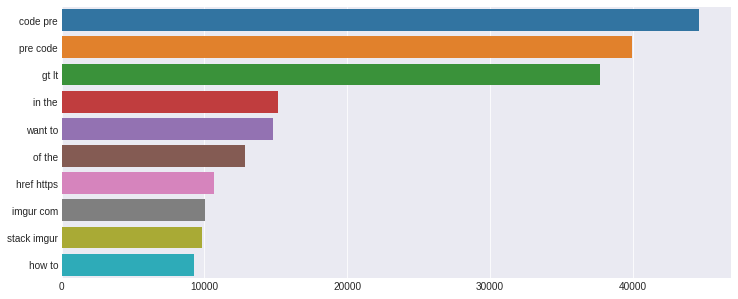

In [24]:
plt.figure(figsize = (12, 5))
top_ques_bigrams = get_top_ques_bigrams(train['body'])[:10]
x, y = map(list,zip(*top_ques_bigrams))
sns.barplot(x = y, y = x)

plt.show()

## Data Preprocessing and Cleaning

In [25]:
def remove_stopwords(string):
    word_list = [word.lower() for word in string.split()]
    stopwords_list = list(stopwords.words("english"))
    for word in word_list:
        if word in stopwords_list:
            word_list.remove(word)
    return ' '.join(word_list)

In [26]:
for column in ['body', 'title']:

    train[column] = train[column].map(lambda x: re.sub('\\n',' ',str(x)))
    train[column] = train[column].map(lambda x: re.sub(r'\W',' ',str(x)))
    train[column] = train[column].map(lambda x: re.sub(r'https\s+|www.\s+',r'', str(x)))
    train[column] = train[column].map(lambda x: re.sub(r'http\s+|www.\s+',r'', str(x)))
    train[column] = train[column].map(lambda x: re.sub(r'\s+[a-zA-Z]\s+',' ',str(x)))
    train[column] = train[column].map(lambda x: re.sub(r'\^[a-zA-Z]\s+',' ',str(x)))
    train[column] = train[column].map(lambda x: re.sub(r'\s+',' ',str(x)))
    train[column] = train[column].str.lower()

    train[column] = train[column].map(lambda x: re.sub(r"\’", "\'", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"won\'t", "will not", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"can\'t", "can not", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"don\'t", "do not", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"dont", "do not", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"n\’t", " not", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"n\'t", " not", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"\'re", " are", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"\'s", " is", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"\’d", " would", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"\d", " would", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"\'ll", " will", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"\'t", " not", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"\'ve", " have", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"\'m", " am", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"\n", "", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"\r", "", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"[0-9]", "digit", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"\'", "", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"\"", "", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r'[?|!|\'|"|#]',r'', str(x)))
    train[column] = train[column].map(lambda x: re.sub(r'[.|,|)|(|\|/]',r' ', str(x)))
    train[column] = train[column].apply(lambda x: remove_stopwords(x))

train['description'] = train['title'] + " " + train['body']
train.head()

,id,title,body,tags,creationdate,y,description
0,34552656,java repeat task every random seconds,already familiar repeating tasks every seconds...,"java,repeat,",2016-01-01 00:21:59,LQ_CLOSE,java repeat task every random seconds already ...
1,34552974,to get the child records different tables base...,am would different tables like select system s...,"sql,sql-server,",2016-01-01 01:44:52,LQ_EDIT,to get the child records different tables base...
2,34553034,are java optionals immutable,like understand java would optionals designed ...,"java,optional,",2016-01-01 02:03:20,HQ,are java optionals immutable like understand j...
3,34553174,text overlay image darkened opacity react native,am attempting overlay title an image image dar...,"javascript,image,overlay,react-native,opacity,",2016-01-01 02:48:24,HQ,text overlay image darkened opacity react nati...
4,34553318,ternary operator swift so picky,question very simple just could find answer p ...,"swift,operators,whitespace,ternary-operator,op...",2016-01-01 03:30:17,HQ,ternary operator swift so picky question very ...


In [27]:
targets = {'HQ': 0, 'LQ_EDIT': 1, 'LQ_CLOSE': 2}
train['y'] = train['y'].map(targets)
train.head()

,id,title,body,tags,creationdate,y,description
0,34552656,java repeat task every random seconds,already familiar repeating tasks every seconds...,"java,repeat,",2016-01-01 00:21:59,2,java repeat task every random seconds already ...
1,34552974,to get the child records different tables base...,am would different tables like select system s...,"sql,sql-server,",2016-01-01 01:44:52,1,to get the child records different tables base...
2,34553034,are java optionals immutable,like understand java would optionals designed ...,"java,optional,",2016-01-01 02:03:20,0,are java optionals immutable like understand j...
3,34553174,text overlay image darkened opacity react native,am attempting overlay title an image image dar...,"javascript,image,overlay,react-native,opacity,",2016-01-01 02:48:24,0,text overlay image darkened opacity react nati...
4,34553318,ternary operator swift so picky,question very simple just could find answer p ...,"swift,operators,whitespace,ternary-operator,op...",2016-01-01 03:30:17,0,ternary operator swift so picky question very ...


## BERT Model

## Bert large uncased

- 24-layer, 1024-hidden, 16-heads, 340M parameters
- Trained on lower-cased English text

- max_len: Maximum sequence size for BERT is 512
- batch_encode_plus: It will generate a dictionary which contains the input_ids, token_type_ids and the attention_mask as list for each input sentence

In [28]:
# Maximum sequence size for BERT is 512

def regular_encode(texts, tokenizer, maxlen = 512):
    enc_di = tokenizer.batch_encode_plus(texts, return_attention_masks = False, return_token_type_ids = False, pad_to_max_length = True, max_length = maxlen)
    return np.array(enc_di['input_ids'])

In [29]:
#bert large uncased pretrained tokenizer

tokenizer = transformers.BertTokenizer.from_pretrained('bert-large-uncased')

## Splitting the data into Train an Test

In [30]:
X_train, X_test, y_train, y_test = train_test_split(train['description'], train['y'], random_state = 22, test_size = 0.3)

In [31]:
#tokenizing the questions descriptions and converting the categories into one hot vectors using tf.keras.utils.to_categorical

Xtrain_encoded = regular_encode(X_train.astype('str'), tokenizer, maxlen = 128)
ytrain_encoded = tf.keras.utils.to_categorical(y_train, num_classes = 3, dtype = 'int32')
Xtest_encoded = regular_encode(X_test.astype('str'), tokenizer, maxlen = 128)
ytest_encoded = tf.keras.utils.to_categorical(y_test, num_classes = 3, dtype = 'int32')

In [32]:
def build_model(transformer, loss = 'categorical_crossentropy', max_len = 512):
    input_word_ids = tf.keras.layers.Input(shape = (max_len,), dtype = tf.int32, name = "input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]

    #adding dropout layer
    x = tf.keras.layers.Dropout(0.40)(cls_token)

    #using a dense layer of 3 neurons as the number of unique categories is 3. 
    out = tf.keras.layers.Dense(3, activation = 'sigmoid')(x)

    model = tf.keras.Model(inputs = input_word_ids, outputs = out)
    model.compile(tf.keras.optimizers.Adam(lr = 3e-5), loss = loss, metrics = ['accuracy'])
    return model

In [33]:
#building the model on tpu

with strategy.scope():
    transformer_layer = transformers.TFAutoModel.from_pretrained('bert-large-uncased')
    model = build_model(transformer_layer, max_len = 128)
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 128)]             0         
_________________________________________________________________
tf_bert_model (TFBertModel)  ((None, 128, 1024), (None 335141888 
_________________________________________________________________
tf_op_layer_strided_slice (T [(None, 1024)]            0         
_________________________________________________________________
dropout_73 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3075      
Total params: 335,144,963
Trainable params: 335,144,963
Non-trainable params: 0
_________________________________________________________________


In [34]:
#creating the training and testing dataset.

BATCH_SIZE = 32*strategy.num_replicas_in_sync
AUTO = tf.data.experimental.AUTOTUNE 
train_dataset = (tf.data.Dataset.from_tensor_slices((Xtrain_encoded, ytrain_encoded)).repeat().shuffle(2048).batch(BATCH_SIZE).prefetch(AUTO))
test_dataset = (tf.data.Dataset.from_tensor_slices(Xtest_encoded).batch(BATCH_SIZE))

In [35]:
#training for 20 epochs

n_steps = Xtrain_encoded.shape[0] // BATCH_SIZE
train_history = model.fit(train_dataset, steps_per_epoch = n_steps, epochs = 20)

Epoch 1/20
164/164 [==============================] - 71s 432ms/step - loss: 0.5825 - accuracy: 0.7269
Epoch 2/20
164/164 [==============================] - 71s 431ms/step - loss: 0.3186 - accuracy: 0.8684
Epoch 3/20
164/164 [==============================] - 71s 432ms/step - loss: 0.2723 - accuracy: 0.8886
Epoch 4/20
164/164 [==============================] - 71s 432ms/step - loss: 0.2421 - accuracy: 0.9011
Epoch 5/20
164/164 [==============================] - 71s 431ms/step - loss: 0.1930 - accuracy: 0.9211
Epoch 6/20
164/164 [==============================] - 71s 431ms/step - loss: 0.1592 - accuracy: 0.9361
Epoch 7/20
164/164 [==============================] - 71s 432ms/step - loss: 0.1174 - accuracy: 0.9542
Epoch 8/20
164/164 [==============================] - 71s 431ms/step - loss: 0.0876 - accuracy: 0.9659
Epoch 9/20
164/164 [==============================] - 71s 432ms/step - loss: 0.0641 - accuracy: 0.9767
Epoch 10/20
164/164 [==============================] - 71s 431ms/step - l

## Prediction Accuracy on Validation dataset

In [36]:
#making predictions 

preds = model.predict(test_dataset, verbose = 1)

#converting the one hot vector output to a linear numpy array.
pred_classes = np.argmax(preds, axis = 1)

71/71 [==============================] - 20s 278ms/step


In [37]:
print('Prediction Accuracy on Validation dataset: ', np.round(100*accuracy_score(pred_classes, y_test), 2), '%')

Prediction Accuracy on Validation dataset:  88.21 %


### Classification Accuracy over validation dataset: 87.6%

Next Steps:

- Keep 20% dataset aside for testing
- Use 80% dataset for training/validation purpose
- Train model on 70-30 split of 80% of above data
- Run model, fetch predictions on 20% left aside earlier

### To be updated......